# Basic Qcircuit

In [37]:
from qiskit import *
%matplotlib inline

In [38]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [39]:
circuit = QuantumCircuit(qr, cr)

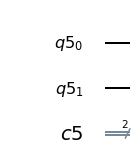

In [40]:
circuit.draw(output='mpl')

# Identity Gate

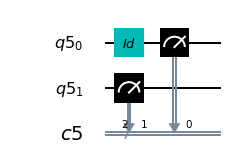

In [41]:
circuit.iden(0)
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

In [43]:
simulator = Aer.get_backend('qasm_simulator')

In [44]:
result = execute(circuit, backend=simulator).result()

In [45]:
from qiskit.visualization import plot_histogram

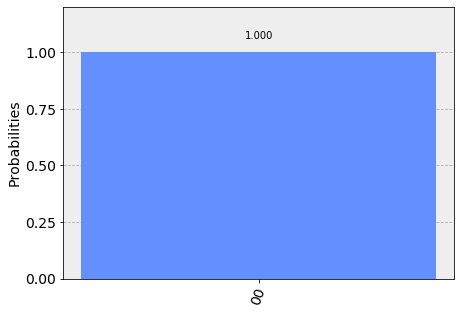

In [46]:
plot_histogram(result.get_counts(circuit))

# Running on real quantum hardware

In [47]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')

In [48]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [49]:
num_qubits = 2

from qiskit.providers.ibmq import least_busy
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)

ibmqx2


In [50]:
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [51]:
job = execute(circuit, backend=qcomp)

In [52]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


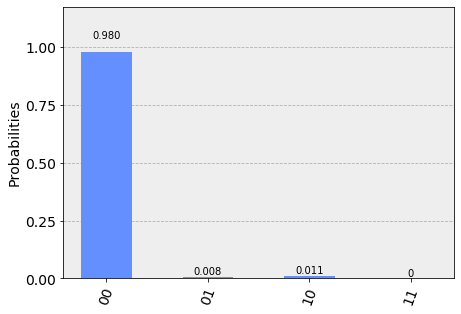

In [53]:
result = job.result()
plot_histogram(result.get_counts(circuit))

In [54]:
%qiskit_disable_job_watcher

In [55]:
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [61]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

# Hadamard Gate

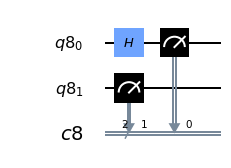

In [62]:
circuit.h(0)
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

In [63]:
job = execute(circuit, backend=qcomp)

In [64]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


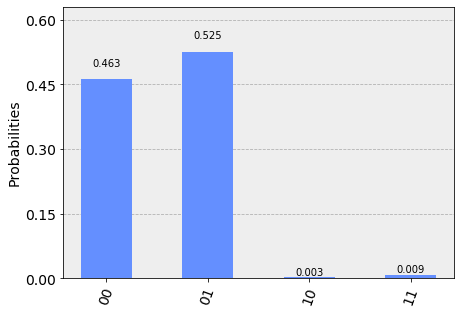

In [65]:
result = job.result()
plot_histogram(result.get_counts(circuit))

# Pauli X Operator (NOT Gate)

In [66]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

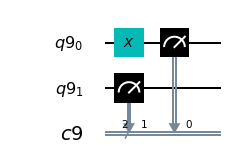

In [67]:
circuit.x(0)
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

In [68]:
job = execute(circuit, backend=qcomp)

In [69]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


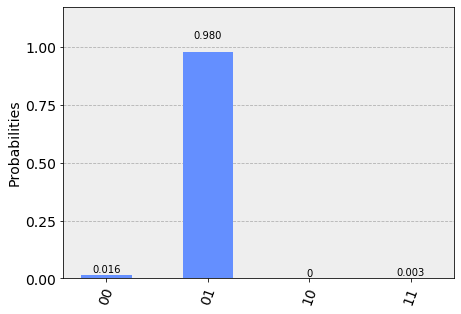

In [70]:
result = job.result()
plot_histogram(result.get_counts(circuit))

# Pauli Y Operator

In [71]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

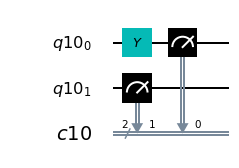

In [72]:
circuit.y(0)
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

In [73]:
job = execute(circuit, backend=qcomp)

In [74]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


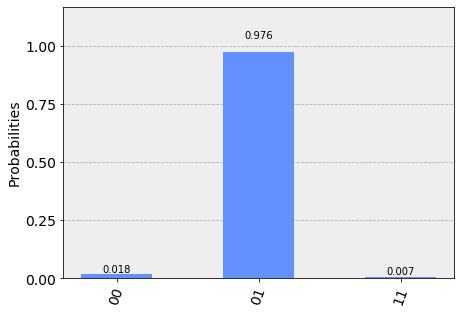

In [75]:
result = job.result()
plot_histogram(result.get_counts(circuit))

# Pauli Z Operator

In [81]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

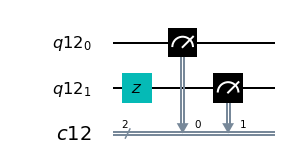

In [82]:
circuit.z(1)
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

In [83]:
job = execute(circuit, backend=qcomp)

In [84]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


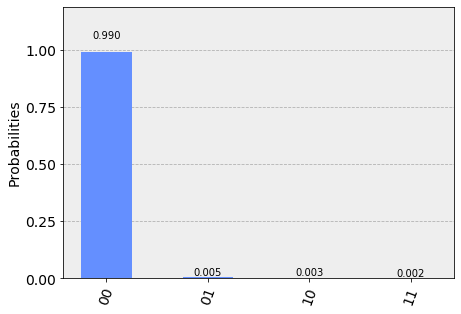

In [85]:
result = job.result()
plot_histogram(result.get_counts(circuit))

# Visualizing Phase

In [94]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

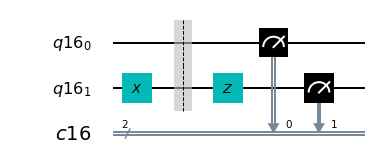

In [95]:
circuit.x(1)
circuit.barrier()
circuit.z(1)
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

In [96]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)

[ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]


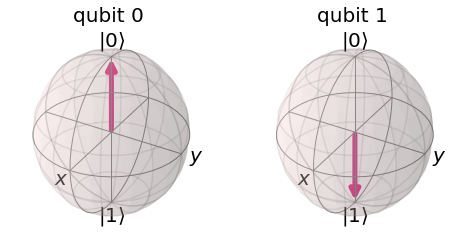

In [97]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

In [108]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

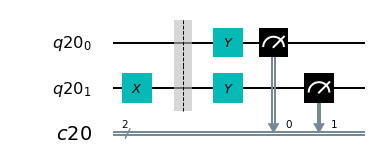

In [109]:
circuit.x(1)
circuit.barrier()
circuit.y(0)
circuit.y(1)
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

In [110]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


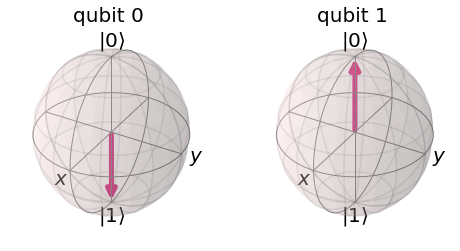

In [111]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

# PHASE (R\phi) Gate

In [218]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)

In [219]:
import math as m

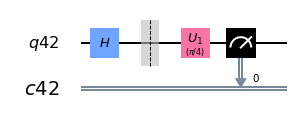

In [220]:
circuit.h(0)
circuit.barrier()
circuit.u1(m.pi/4, 0)
circuit.measure(0, 0)
circuit.draw(output='mpl')

In [221]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.        +0.j         0.70710678+0.70710678j]


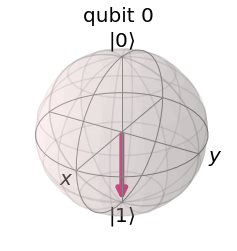

In [222]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

# S Gate

In [239]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)

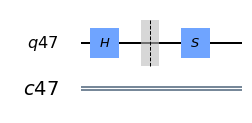

In [240]:
circuit.h(0)
circuit.barrier()
circuit.s(0)
circuit.draw(output='mpl')

In [241]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.70710678+0.j         0.        +0.70710678j]


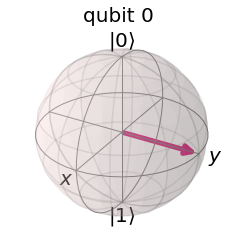

In [242]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

# T Gate

In [261]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)

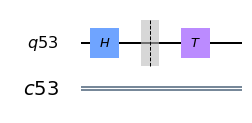

In [262]:
circuit.h(0)
circuit.barrier()
circuit.t(0)
circuit.draw(output='mpl')

In [266]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.70710678+0.j  0.5       +0.5j]


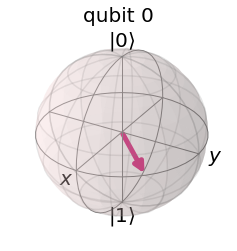

In [267]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

# Rotational Gate

### Rotation arround x-axis (rx Gate)

In [253]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)

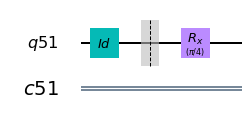

In [254]:
circuit.iden(0)
circuit.barrier()
circuit.rx(m.pi/4, 0)
circuit.draw(output='mpl')

In [255]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.92387953+0.j         0.        -0.38268343j]


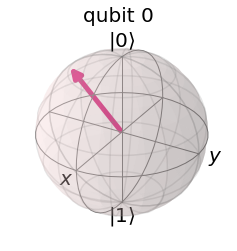

In [256]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

### Rotation arround y-axis

In [271]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)

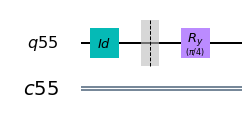

In [272]:
circuit.iden(0)
circuit.barrier()
circuit.ry(m.pi/4, 0)
circuit.draw(output='mpl')

In [273]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.92387953+0.j 0.38268343+0.j]


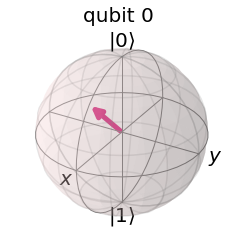

In [274]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

### Rotation arround z-axis

In [279]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)

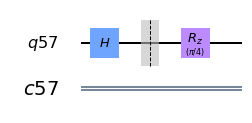

In [280]:
circuit.h(0)
circuit.barrier()
circuit.rz(m.pi/4, 0)
circuit.draw(output='mpl')

In [281]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.70710678+0.j  0.5       +0.5j]


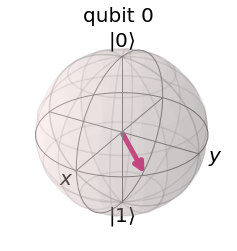

In [282]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

# Gates on two Q-bits

### CNOT Gate

In [285]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

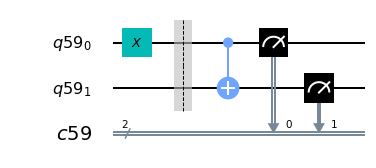

In [286]:
circuit.x(0)
circuit.barrier()
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

In [287]:
job = execute(circuit, backend=qcomp)

In [288]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


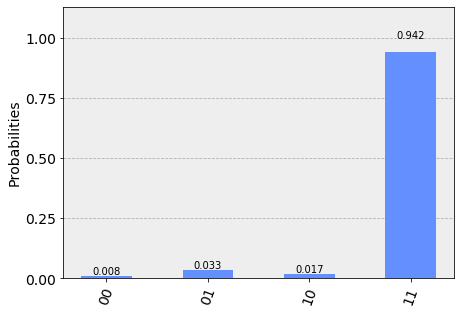

In [289]:
result = job.result()
plot_histogram(result.get_counts(circuit))

### CZ Gate

In [290]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

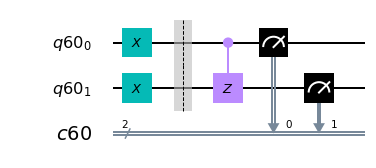

In [291]:
circuit.x(0)
circuit.x(1)
circuit.barrier()
circuit.cz(0, 1)
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

In [292]:
job = execute(circuit, backend=qcomp)

In [293]:
job_monitor(job)

Job Status: job has successfully run


Error checking job status using websocket, retrying using HTTP.


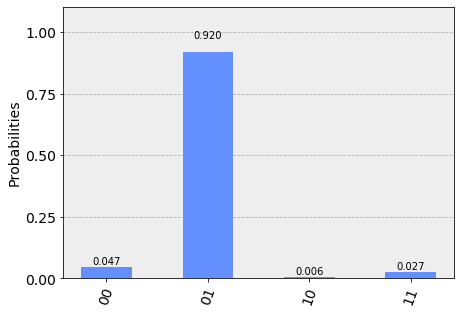

In [299]:
result = job.result()
plot_histogram(result.get_counts(circuit))

### SWAP Gate

In [300]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

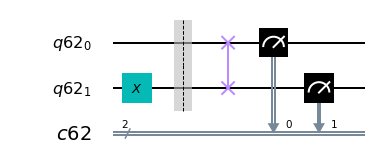

In [301]:
circuit.x(1)
circuit.barrier()
circuit.swap(0, 1)
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

In [302]:
job = execute(circuit, backend=qcomp)

In [303]:
job_monitor(job)

Job Status: job has successfully run


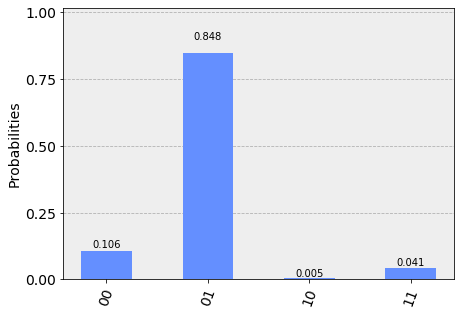

In [304]:
result = job.result()
plot_histogram(result.get_counts(circuit))